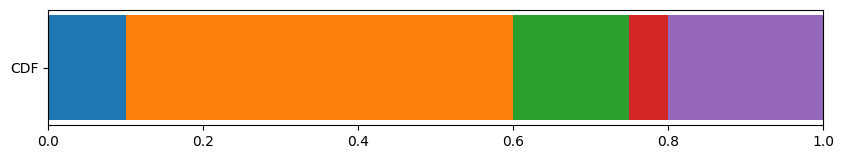

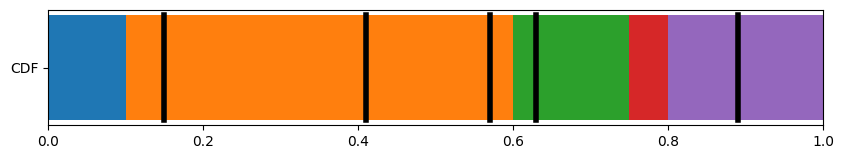

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot(normalised_weights, u_j=None, stratified=False, residual=False):
    nparts = len(normalised_weights)
    floors = np.floor(normalised_weights * nparts)

    # Plot
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 1.5)
    plt.xlim([0, 1])
    for i, particle_weight in enumerate(normalised_weights):
        l = 0
        for j in range(i):
            l += normalised_weights[j]
        ax.barh(['CDF'], [particle_weight], left=l)
        if residual is not False:
            if floors[i] != 0:
                ax.barh(['CDF'], [(1 / nparts) * floors[i]], left=l, color='White')

    if u_j is not None:
        plt.plot([u_j, u_j], [-0.4, 0.4], 'k-', lw=4)
    if stratified is not False:
        plt.plot([s_lb, s_lb], [-0.4, 0.4], 'w:', lw=2)
        
particle_weights = [1, 5, 1.5, 0.5, 2]
n_particles = len(particle_weights)

normalised_weights = np.array([particle/sum(particle_weights) for particle in particle_weights])
plot(normalised_weights)

u_j = [0.15, 0.41, 0.57, 0.63, 0.89]
plot(normalised_weights, u_j)

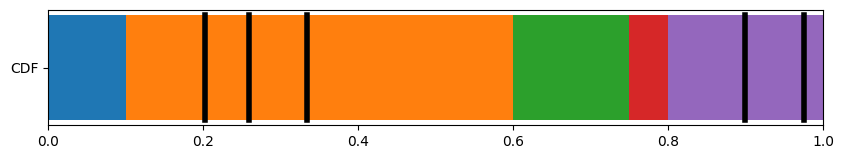

In [3]:
import numpy as np

# Pick N random points in the uniform distribution u~U(0,1]
u_j = np.random.rand(5)

plot(normalised_weights, u_j)

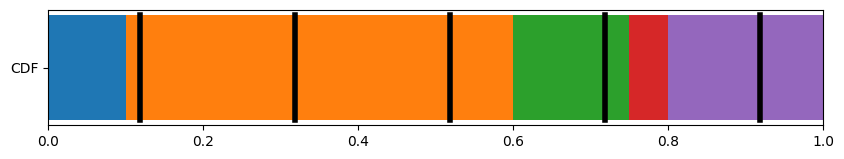

In [4]:
# Pick a starting point
s = np.random.uniform(0, 1/n_particles)

# Calculate N equidistant points from the starting point
u_j = s + (1 / n_particles) * np.arange(n_particles)

plot(normalised_weights, u_j)

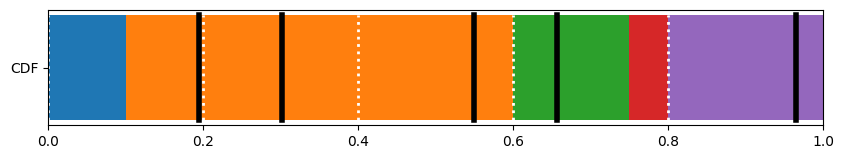

In [5]:
# Calculate lower bound of each stratum
s_lb = np.arange(n_particles) * (1 / n_particles)

# Independently pick a point from each stratum
u_j = np.random.uniform(s_lb, s_lb + (1 / n_particles))

plot(normalised_weights, u_j, s_lb)

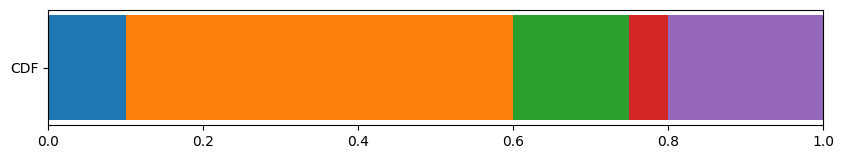

In [6]:
plot(normalised_weights)

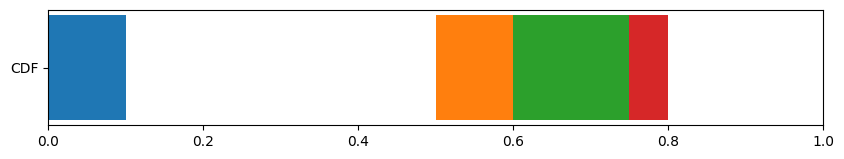

In [7]:
plot(normalised_weights, residual=True)

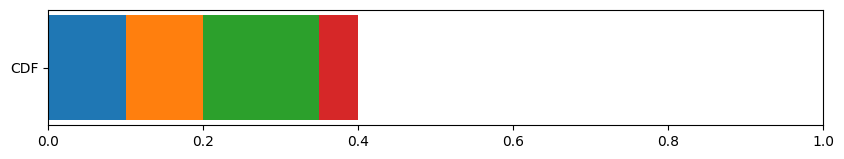

In [8]:
floors = np.floor(normalised_weights * n_particles)
residuals = (normalised_weights - floors/n_particles)
plot(residuals)

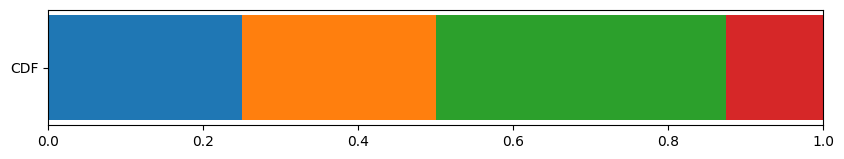

In [9]:
normalised_residual_weights = residuals*(1/sum(residuals))
plot(normalised_residual_weights)

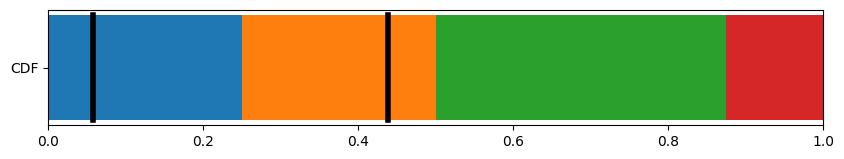

In [10]:
u_j = np.random.rand(2)

plot(normalised_residual_weights, u_j)

In [11]:
from stonesoup.types.particle import Particle

particles = [Particle(np.array([[i]]), weight=1/5) for i in range(5)]

In [12]:
from stonesoup.resampler.particle import MultinomialResampler

# Resampler
resampler = MultinomialResampler()

# Resample particles
resampled_particles = resampler.resample(particles)
print("---- State vector of resampled particles ----")
print(resampled_particles.state_vector)
print("------ Weights of resampled particles -------")
print(resampled_particles.weight)

# Repeat while upsampling particles
upsampled_particles = resampler.resample(particles, nparts=10)
print("---- State vector of upsampled particles ----")
print(upsampled_particles.state_vector)
print("------ Weights of upsampled particles -------")
print(upsampled_particles.weight)

---- State vector of resampled particles ----
[[2 0 1 0 4]]
------ Weights of resampled particles -------
[Probability(0.2) Probability(0.2) Probability(0.2) Probability(0.2)
 Probability(0.2)]
---- State vector of upsampled particles ----
[[4 4 1 0 2 1 4 4 3 4]]
------ Weights of upsampled particles -------
[Probability(0.10000000000000002) Probability(0.10000000000000002)
 Probability(0.10000000000000002) Probability(0.10000000000000002)
 Probability(0.10000000000000002) Probability(0.10000000000000002)
 Probability(0.10000000000000002) Probability(0.10000000000000002)
 Probability(0.10000000000000002) Probability(0.10000000000000002)]


In [13]:
from stonesoup.resampler.particle import ESSResampler, ResidualResampler

# Define Resampler
subresampler = ResidualResampler(residual_method='systematic')
resampler = ESSResampler(resampler=subresampler)

# Resample Particles
resampler.resample(particles)

ParticleState(
    state_vector=[[0 1 2 3 4]],
    timestamp=None,
    weight=array([Probability(0.2), Probability(0.2), Probability(0.2),
                  Probability(0.2), Probability(0.2)], dtype=object),
    log_weight=[-1.60943791 -1.60943791 -1.60943791 -1.60943791 -1.60943791],
    parent=None,
    particle_list=[Particle(
                      state_vector=[[0]],
                      weight=0.2,
                      parent=None),
                   Particle(
                      state_vector=[[1]],
                      weight=0.2,
                      parent=None),
                   Particle(
                      state_vector=[[2]],
                      weight=0.2,
                      parent=None),
                   Particle(
                      state_vector=[[3]],
                      weight=0.2,
                      parent=None),
                   Particle(
                      state_vector=[[4]],
                      weight=0.2,
                      paren